<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml07_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent(경사 하강법)

*   머신 러닝의 목적은 손실(비용) 함수를 최소로 만드는 모델 파라미터(w0, w1, ...)들을 찾는 것.
*   회귀 문제에서는 비용 함수는 MSE(w)
    *   w에 대한 2차 함수의 최솟값의 위치를 찾는 문제.
*   경사 하강법: 함수의 최솟값의 위치를 찾는 알고리즘의 하나.
    *   함수의 임의의 위치 w에서 시작.
    *   그 위치에서 접선의 기울기(gradient)를 계산.
    *   gradient의 절댓값이 줄어드는 방향으로 w 값을 약간 변경.
    *   위의 과정을 충분히 반복하면 함수가 최소가 되는 위치 w를 찾을 수 있음.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

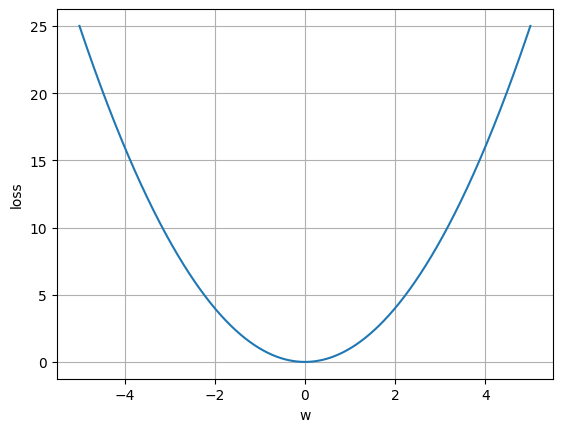

In [6]:
w = np.arange(-5, 5, 0.0001)
fn = w ** 2

plt.plot(w, fn)
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

In [10]:
# 임의의 w 위치를 선택
w_init = 4

# 선택한 위치(w_init)에서 함수의 접선의 기울기(gradient)를 계산
gradient = 2 * w_init

# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

3.2

In [11]:
# 이동한 위치를 다시 시작.
w_init = w_next

# 다시 시작하는 위치에서 함수의 접선의 기울기를 계산
gradient = 2 * w_init

# 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

2.56

In [18]:
def gradient_descent(learning_rate=0.1, max_iter=50, tolerance=0.0001):
    # f(w) = w^2 2차 함수를 시각화
    w = np.arange(-5, 5, 0.0001)
    fn = w ** 2
    plt.plot(w, fn, color='DarkGray')

    # 임의의 점에서 시작
    w_init = -4
    # 시작점의 위치를 점으로 표시
    plt.scatter(w_init, w_init ** 2, label='0')

    convergence = False
    for n in range(max_iter):
        # 시작점의 위치에서 gradient를 계산
        gradient = 2 * w_init  # f(w) = w^2 일 때, gradinet = df/dw = 2 * w

        # gradient의 반대 방향으로 약간 이동
        w_next = w_init - gradient * learning_rate

        # 이동한 점의 위치를 점으로 표시
        plt.scatter(w_next, w_next ** 2, label=f'{n + 1}')

        # 반복을 계속할 지, 아니면 멈출 지를 결정.
        # 이동한 위치 w_next와 이동하기 전 위치 w_init 사이의 거리가
        # tolerance(기본값 0.0001)보다 작으면 반복을 멈춤.
        if np.abs(w_next - w_init) < tolerance:
            convergence = True
            break  # 반복문을 멈춤.

        # 다음 반복(iteration)을 시작하기 전에 시작 위치를 이동된 위치로 설정.
        w_init = w_next


    print('함수가 최솟값인 w 위치 =', w_next)
    if convergence == False:
        print('ConvergenceWarning: 정확한 최솟값의 위치가 아닐 수 있습니다.')
    plt.legend()
    plt.grid()
    plt.xlabel('w')
    plt.ylabel('loss')
    plt.show()

함수가 최솟값인 w 위치 = -0.0003402823669209386


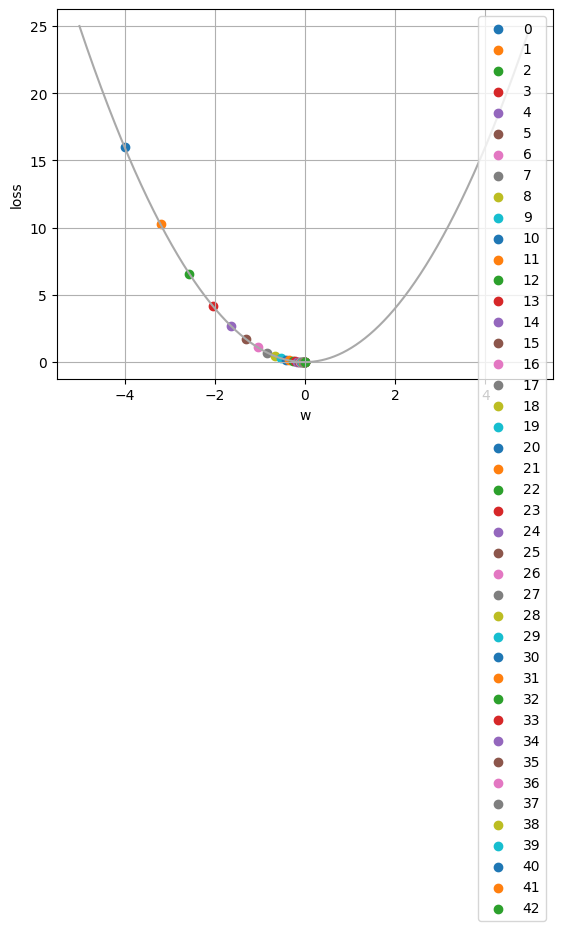

In [19]:
gradient_descent()

함수가 최솟값인 w 위치 = -0.0003402823669209386


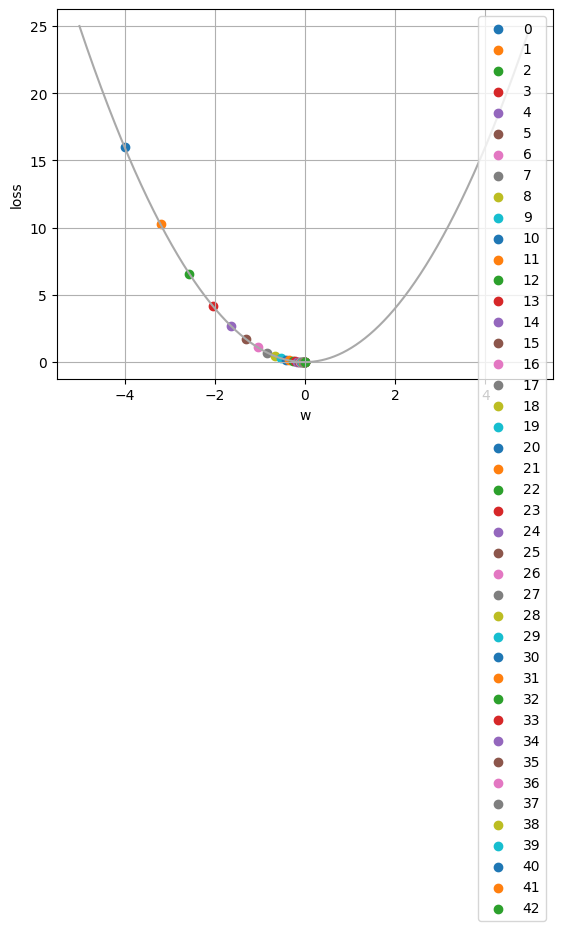

In [21]:
gradient_descent(max_iter=1000)

함수가 최솟값인 w 위치 = -3.653754093327259e-05


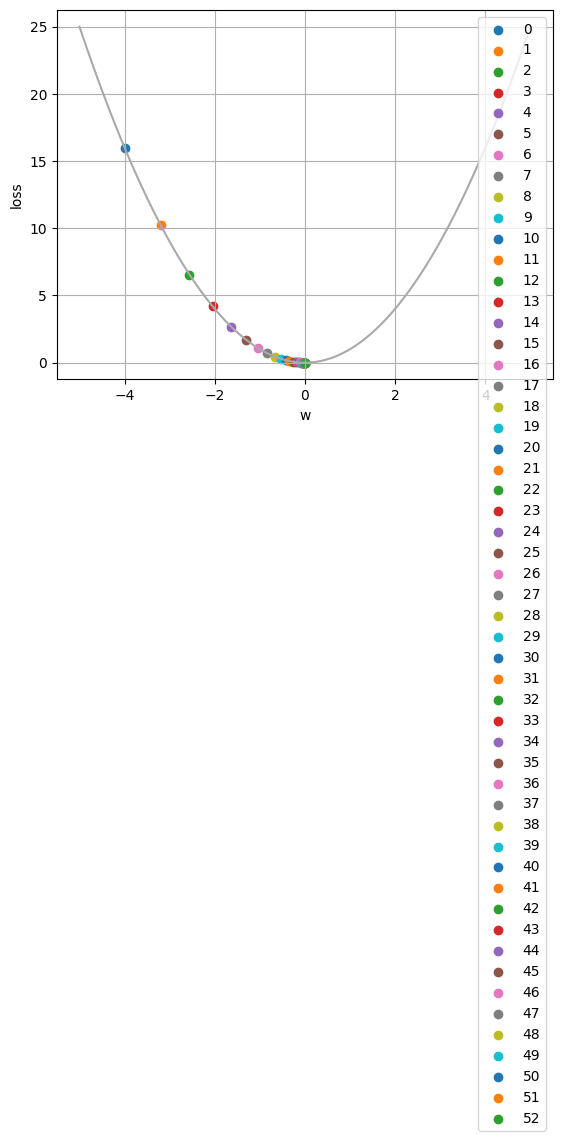

In [20]:
gradient_descent(max_iter=1000, tolerance=0.00001)

함수가 최솟값인 w 위치 = -0.04611686018427388


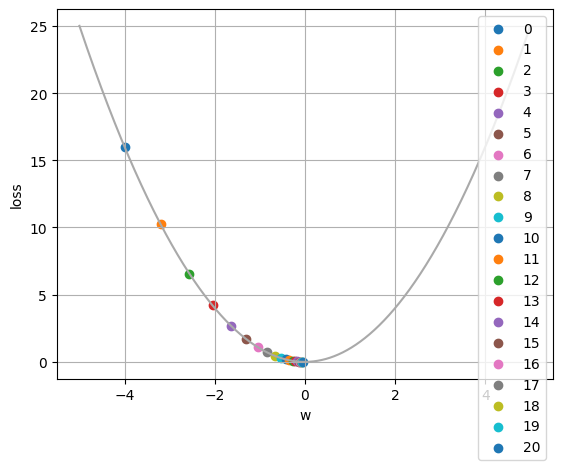

In [23]:
gradient_descent(max_iter=20)

함수가 최솟값인 w 위치 = -0.0001462463376025189


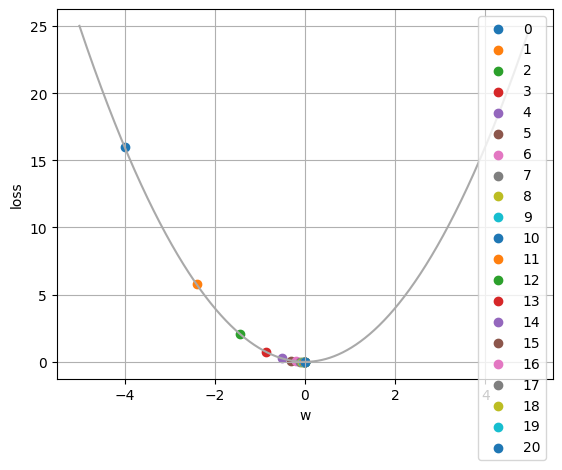

In [24]:
gradient_descent(learning_rate=0.2)

함수가 최솟값인 w 위치 = 3.158920892214423e-05


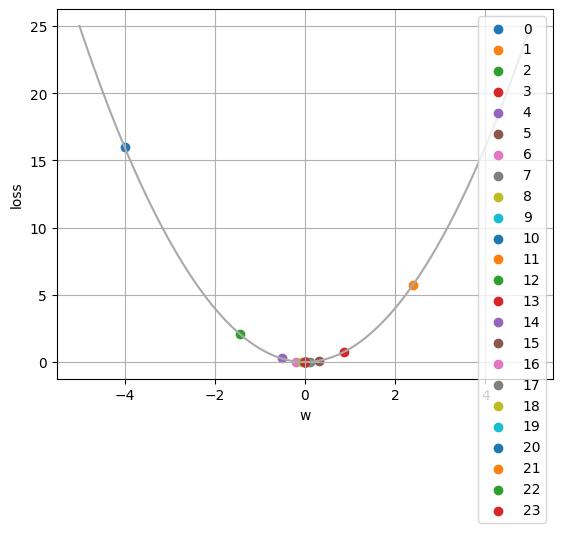

In [25]:
gradient_descent(learning_rate=0.8)

함수가 최솟값인 w 위치 = -4.0


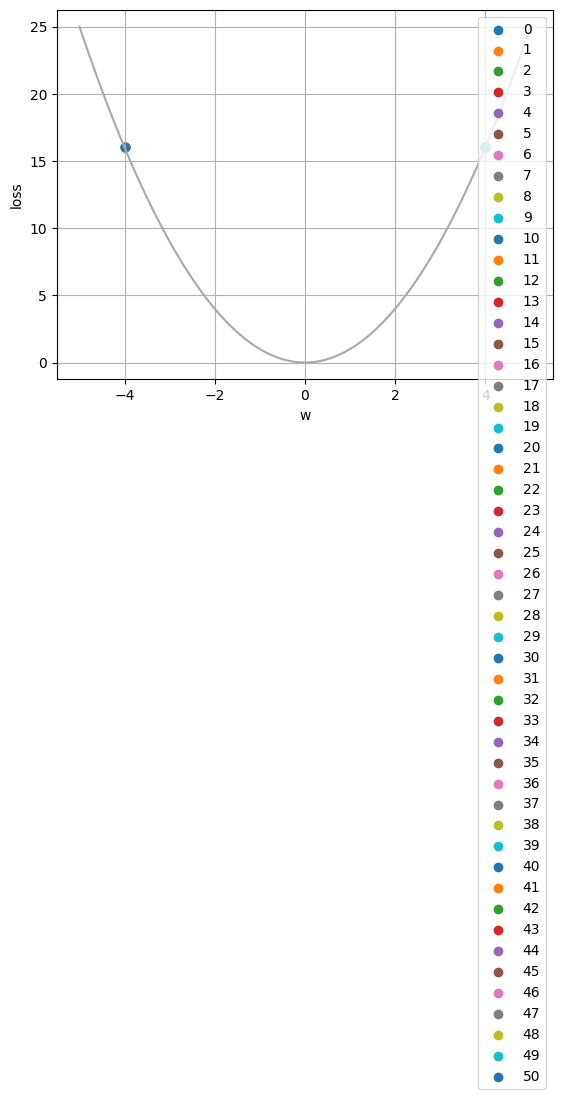

In [26]:
gradient_descent(learning_rate=1.0)

함수가 최솟값인 w 위치 = -24.76694568960003


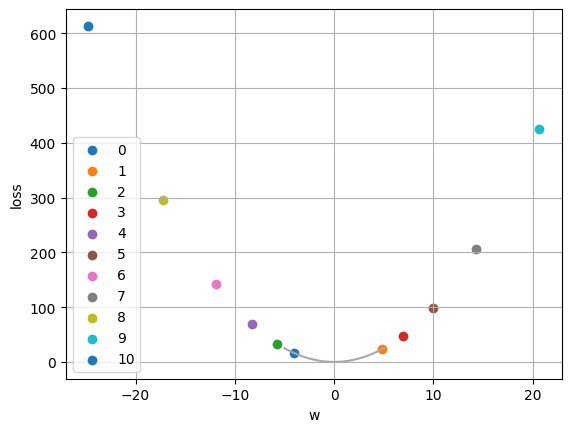

In [27]:
gradient_descent(learning_rate=1.1, max_iter=10)

**학습률(learning rate)** 하이퍼 파라미터

*   학습률이 작은 경우에는 최솟값을 향해서 천천히 움직임.
*   학습률이 큰 경우에는 최솟값을 향해서 빠르게 또는 불안정하게 움직임.
*   학습률이 너무 작으면 최대 반복 횟수(max_iter) 안에서 최솟값의 위치로 수렴(convergence)하지 못할 수도 있음.
    *   학습률을 더 크게 만듦.
    *   최대 반복 횟수(max_iter)를 늘려줌.
    *   수렴 기준(tolerance)를 더 크게 만듦.
*   학습률이 너무 크면 수렴하지 못하고 발산(divergence)하는 경우가 생기기도 함.
    *   학습률을 줄여야 함.
*   머신 러닝 알고리즘들 중에서는 처음에는 학습률을 크게 하고, 반복이 진행될 때마다 학습률을 점진적으로 줄여 나가는 방식으로 데이터를 학습하는 알고리즘도 있음.
